In [1]:
import pandas as pd
import numpy as np



In [3]:
data=pd.read_excel('marketing_customer_analysis.xlsx') 
data.head() 

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     10910 non-null  int64         
 1   Customer                       10910 non-null  object        
 2   State                          10279 non-null  object        
 3   Customer Lifetime Value        10910 non-null  float64       
 4   Response                       10279 non-null  object        
 5   Coverage                       10910 non-null  object        
 6   Education                      10910 non-null  object        
 7   Effective To Date              10910 non-null  datetime64[ns]
 8   EmploymentStatus               10910 non-null  object        
 9   Gender                         10910 non-null  object        
 10  Income                         10910 non-null  int64         
 11  Location Code  

In [5]:
data=data.dropna()


In [8]:
data.reset_index(drop=True, inplace=True)


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
dfcat=data.select_dtypes(include=object)

In [13]:
import numpy as np 
# isolate numeric features 
dfnum=data.select_dtypes(include=np.number)

In [14]:
dfnum.head()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
1,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
2,10,5154.764074,82730,127,13.0,31,0.0,1,442.521087
3,13,5454.587929,66334,69,25.0,25,0.0,4,331.200000
4,16,5326.677654,76717,66,26.0,10,0.0,6,300.528579


In [19]:
dfnum.drop(['Unnamed: 0'], axis = 1, inplace = True)


C:\Users\zeyad\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
dfnum.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,14947.917300,22139,100,34.0,31,0.0,2,480.000000
1,22332.439460,49078,97,10.0,3,0.0,2,484.013411
2,5154.764074,82730,127,13.0,31,0.0,1,442.521087
3,5454.587929,66334,69,25.0,25,0.0,4,331.200000
4,5326.677654,76717,66,26.0,10,0.0,6,300.528579


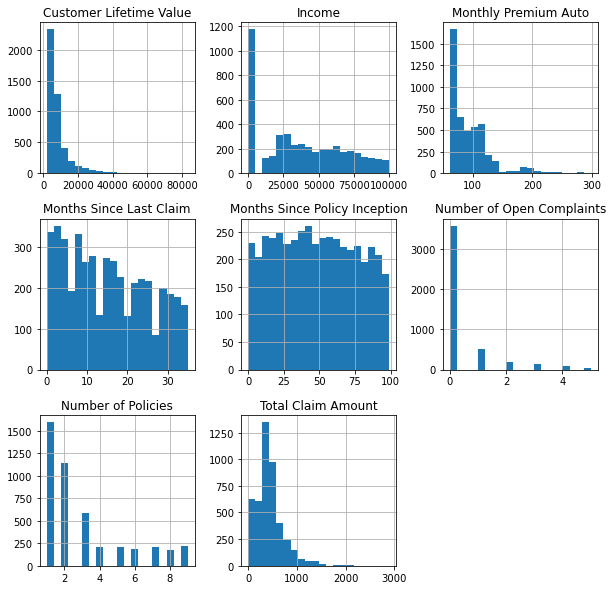

In [22]:
dfnum.hist(bins=20,figsize=(10,10));


In [36]:
iqr=np.percentile(dfnum['Customer Lifetime Value'],75)-np.percentile(dfnum['Customer Lifetime Value'],25)



In [38]:
upper_limit= np.percentile(dfnum['Customer Lifetime Value'],75)+ 1.5*iqr


In [39]:
upper_limit


16282.857491249997

In [41]:
lower_limit= np.percentile(dfnum['Customer Lifetime Value'],25)- 1.5*iqr


In [42]:
lower_limit

-3307.1706507499985

In [43]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3908 entries, 0 to 4542
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     3908 non-null   int64         
 1   Customer                       3908 non-null   object        
 2   State                          3908 non-null   object        
 3   Customer Lifetime Value        3908 non-null   float64       
 4   Response                       3908 non-null   object        
 5   Coverage                       3908 non-null   object        
 6   Education                      3908 non-null   object        
 7   Effective To Date              3908 non-null   datetime64[ns]
 8   EmploymentStatus               3908 non-null   object        
 9   Gender                         3908 non-null   object        
 10  Income                         3908 non-null   int64         
 11  Location Code    

In [44]:
data=data[(data['Customer Lifetime Value']>lower_limit)&(data['Customer Lifetime Value']<=upper_limit)]


In [45]:
data.reset_index(drop=True, inplace=True)


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     3908 non-null   int64         
 1   Customer                       3908 non-null   object        
 2   State                          3908 non-null   object        
 3   Customer Lifetime Value        3908 non-null   float64       
 4   Response                       3908 non-null   object        
 5   Coverage                       3908 non-null   object        
 6   Education                      3908 non-null   object        
 7   Effective To Date              3908 non-null   datetime64[ns]
 8   EmploymentStatus               3908 non-null   object        
 9   Gender                         3908 non-null   object        
 10  Income                         3908 non-null   int64         
 11  Location Code    

<AxesSubplot:>

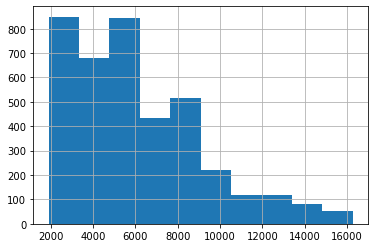

In [47]:
data['Customer Lifetime Value'].hist()


In [50]:
iqr=np.percentile(dfnum['Monthly Premium Auto'],75)-np.percentile(dfnum['Monthly Premium Auto'],25)
upper_limit= np.percentile(dfnum['Monthly Premium Auto'],75)+ 1.5*iqr
lower_limit= np.percentile(dfnum['Monthly Premium Auto'],25)- 1.5*iqr
data=data[(data['Monthly Premium Auto']>lower_limit)&(data['Monthly Premium Auto']<=upper_limit)]
data.reset_index(drop=True, inplace=True)


<AxesSubplot:>

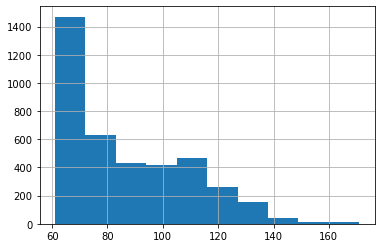

In [51]:
data['Monthly Premium Auto'].hist()


In [54]:
iqr=np.percentile(dfnum['Total Claim Amount'],75)-np.percentile(dfnum['Total Claim Amount'],25)
upper_limit= np.percentile(dfnum['Total Claim Amount'],75)+ 1.5*iqr
lower_limit= np.percentile(dfnum['Total Claim Amount'],25)- 1.5*iqr
data=data[(data['Total Claim Amount']>lower_limit)&(data['Total Claim Amount']<=upper_limit)]
data.reset_index(drop=True, inplace=True)

<AxesSubplot:>

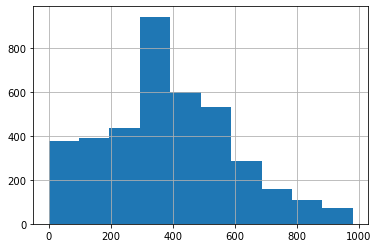

In [55]:
data['Total Claim Amount'].hist()


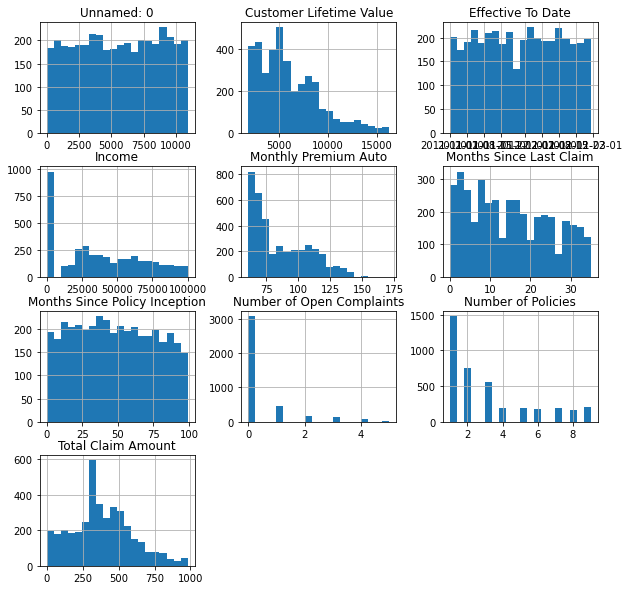

In [58]:
data.hist(bins=20,figsize=(10,10));


In [59]:
y = data['Total Claim Amount']


In [65]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     3908 non-null   int64         
 1   Customer                       3908 non-null   object        
 2   State                          3908 non-null   object        
 3   Customer Lifetime Value        3908 non-null   float64       
 4   Response                       3908 non-null   object        
 5   Coverage                       3908 non-null   object        
 6   Education                      3908 non-null   object        
 7   Effective To Date              3908 non-null   datetime64[ns]
 8   EmploymentStatus               3908 non-null   object        
 9   Gender                         3908 non-null   object        
 10  Income                         3908 non-null   int64         
 11  Location Code    

In [66]:
datanum=data.select_dtypes(include=np.number)


In [67]:
datacat=data.select_dtypes(include=object)


In [85]:
date=np.array(data['Effective To Date'])

In [86]:
date

array(['2011-02-10T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-01-26T00:00:00.000000000', ...,
       '2011-01-07T00:00:00.000000000', '2011-01-06T00:00:00.000000000',
       '2011-02-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [90]:
data['Effective To Date']=pd.to_datetime(data['Effective To Date'],errors='coerce')

In [170]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(data[['Effective To Date']])
df_minmax =transformer.transform(data[['Effective To Date']])
df_minmax


array([[0.68965517],
       [0.01724138],
       [0.43103448],
       ...,
       [0.10344828],
       [0.0862069 ],
       [0.74137931]])

In [171]:
datacat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer          3908 non-null   object
 1   State             3908 non-null   object
 2   Response          3908 non-null   object
 3   Coverage          3908 non-null   object
 4   Education         3908 non-null   object
 5   EmploymentStatus  3908 non-null   object
 6   Gender            3908 non-null   object
 7   Location Code     3908 non-null   object
 8   Marital Status    3908 non-null   object
 9   Policy Type       3908 non-null   object
 10  Policy            3908 non-null   object
 11  Renew Offer Type  3908 non-null   object
 12  Sales Channel     3908 non-null   object
 13  Vehicle Class     3908 non-null   object
 14  Vehicle Size      3908 non-null   object
 15  Vehicle Type      3908 non-null   object
dtypes: object(16)
memory usage: 488.6+ KB


In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datanum)
StandardScaler()
dfminmax=scaler.transform(datanum)

In [173]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(datacat)
ohe = encoder.transform(datacat).toarray()

In [174]:
ohedf=pd.DataFrame(ohe)
ohedf

,0,1,2,3,4,5,6,7,8,9,...,3954,3955,3956,3957,3958,3959,3960,3961,3962,3963
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [175]:
newdata=pd.concat([ohedf,scaleddf],axis=1)
newdata.head

,0,1,2,3,4,5,6,7,8,9,...,3962,3963,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.745356,2.867516,-0.523992,0.613122,1.883640,-0.604234,-0.429022,-0.429413
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.742825,-0.305677,1.471701,1.828950,-0.198474,-0.604234,-0.429022,-0.835154
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.741877,-0.208528,0.931664,-0.782828,0.991305,-0.817441,-0.429022,0.382069
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.740928,-0.249974,1.273651,-0.917920,1.090454,-1.350460,-0.429022,1.193551
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.740612,-1.166678,-1.253187,-0.782828,-0.991660,0.923754,-0.429022,-0.835154


In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(newdata,y, test_size=0.4, random_state=40)

In [177]:
X_train.shape


(2344, 3972)

In [178]:
newdata=pd.concat([ohedf,scaleddf],axis=1)
newdata.head()

,0,1,2,3,4,5,6,7,8,9,...,3962,3963,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.745356,2.867516,-0.523992,0.613122,1.883640,-0.604234,-0.429022,-0.429413
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.742825,-0.305677,1.471701,1.828950,-0.198474,-0.604234,-0.429022,-0.835154
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.741877,-0.208528,0.931664,-0.782828,0.991305,-0.817441,-0.429022,0.382069
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.740928,-0.249974,1.273651,-0.917920,1.090454,-1.350460,-0.429022,1.193551
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.740612,-1.166678,-1.253187,-0.782828,-0.991660,0.923754,-0.429022,-0.835154


In [179]:
X_train,X_test,y_train,y_test=train_test_split(newdata,y, test_size=0.3, random_state=100)


In [180]:
from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error

In [181]:
lm=linear_model.LinearRegression()


In [182]:
model=lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

In [183]:
predictions


array([547.0044485 , 721.10034313, 457.78905166, ..., 331.59187731,
       218.81269513,  63.96195141])

## Our prediction of Total Claim Amount is 77% accurate

In [184]:
r2_score(y_test,predictions)

0.773826301516053

# We can predict Total Claim Amount to the nearest $9,939 - hmmm

In [185]:
mean_squared_error(y_test,predictions)


9939.42561549265

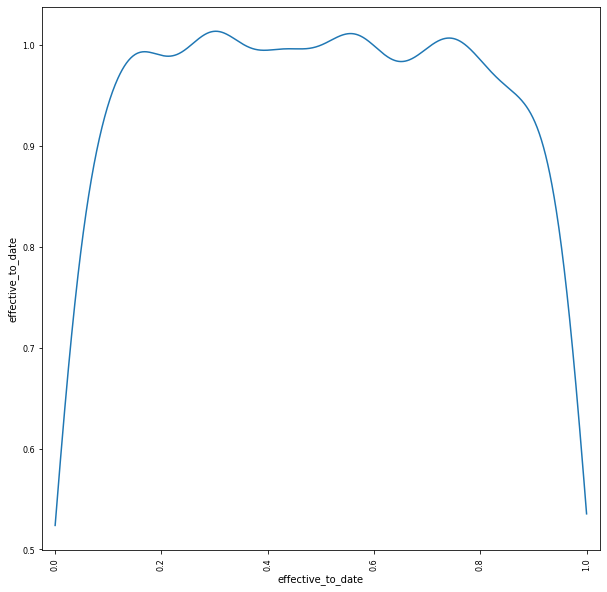

In [186]:
from pandas.plotting import scatter_matrix
Date_MinMax= pd.DataFrame(df_minmax, columns= ['effective_to_date'])
scatter_matrix(Date_MinMax,alpha=0.2,figsize=(10,10),diagonal='kde');

In [195]:
dfnum['Total Claim Amount'].value_counts()

292.800000    64
316.800000    56
331.200000    55
350.400000    54
302.400000    49
              ..
939.528475     1
587.689075     1
551.282130     1
428.064465     1
165.478147     1
Name: Total Claim Amount, Length: 2716, dtype: int64